In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sidetable

In [2]:
## Read Dataset
data = pd.read_csv(r'D:\PURWADHIKA\MODUL 02\DATASET\hotel_bookings.csv')
## copy the original dataset, it can be needed in case
data_hotel = data.copy()
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#### ===== Define each column and its contains ========
##1. Hotel : Resort hotel and City hotel
##2. is_canceled : Value indicating if the booking was canceled (1) or not (0)
##3. arrival_date_year
##4. arrival_date_month                
##5. arrival_date_week_number          
##6. arrival_date_day_of_month         
##7. stays_in_weekend_nights           
##8. stays_in_week_nights              
##9. adults                            
##10. children                         
##11. babies                            
##12. meal                              
##13. country                           
##14. market_segment                    
##15. distribution_channel              
##16. is_repeated_guest                 
##17. previous_cancellations            
##18. previous_bookings_not_canceled    
##19. reserved_room_type                
##20. assigned_room_type                
##21. booking_changes                   
##22. deposit_type                      
##23. days_in_waiting_list              
##24. customer_type                     
##25. adr                               
##26. required_car_parking_spaces       
##27. total_of_special_requests         
##28. reservation_status                
##29. reservation_status_date  
##30. lead_time
##31. company
##32. agent


In [3]:
## Grouping arrival_date_year, arrival_date_month, arrival_date_day_of_month to date
data['Arrival Date'] = data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'].astype(str) + '-' + data['arrival_date_day_of_month'].astype(str)
data['Arrival Date'].head()

0    2015-July-1
1    2015-July-1
2    2015-July-1
3    2015-July-1
4    2015-July-1
Name: Arrival Date, dtype: object

In [4]:
### Checking for type data
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], format='%Y-%m-%d')
data['Arrival Date'] = pd.to_datetime(data['Arrival Date'], format='%Y-%B-%d')
data['is_canceled'] = data['is_canceled'].astype('object')
data['is_repeated_guest'] = data['is_repeated_guest'].astype('object')
# data.dtypes

In [5]:
### ====== Missing Value =======
##Checking Null
data.isnull().sum()

#There 4 missing value, here are the persentage:
def persenMissing(x, y):
    nilai = (y.isnull().sum()/len(x))*(100)
    return nilai
print('Persentage of Missing Value : \nChildren : {}  \nCountry : {}  \nAgent : {}  \nCompany : {} '.format(round(persenMissing(data, data['children']),5), round(persenMissing(data, data['country']),2), round(persenMissing(data, data['agent']),2), round(persenMissing(data, data['company']),2)))

Persentage of Missing Value : 
Children : 0.00335  
Country : 0.41  
Agent : 13.69  
Company : 94.31 


In [6]:
#### ====== Handling Missing Value ========
##Dropping agent and company columns because the persentage is huge
data.drop(['company', 'agent'], axis=1, inplace=True)
##filling missing value of children column using median
data['children'] = data['children'].fillna(value = data['children'].median())
##Filling the Null rows of column country
data['country'] = data['country'].fillna(value = data['country'].mode()[0])

##Checking Null
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [7]:
####Describe Data
data.describe().T
#### Dropping ADR that contains negatif values
# data['adr'].describe()
# data[data['adr']<0]
data.drop(data.loc[data['adr'] == -6.38].index, inplace=True)
# data.describe().T

In [8]:
#### ======== OUTLIERS ===========
#Categorical Column
cat_cols=[i for i in data.columns if data.dtypes[i]=='object']
print('Categorical columns : {}'.format(len(cat_cols)))
print(cat_cols)

print('-'*65)

#Numeric Column
num_cols = [i for i in data.columns if data.dtypes[i]==('int64') or data.dtypes[i]==('float64')]
print('Numerical columns : {}'.format(len(num_cols)))
print(num_cols)

# print(len(data.columns))

Categorical columns : 13
['hotel', 'is_canceled', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
-----------------------------------------------------------------
Numerical columns : 16
['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


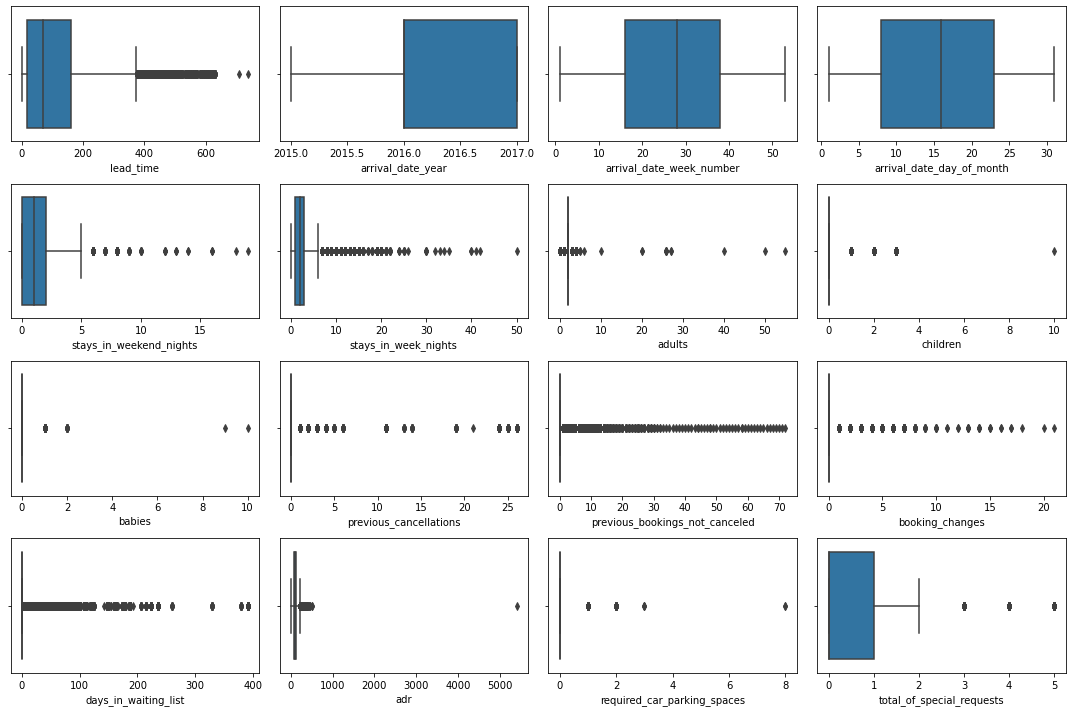

In [9]:
###Detected outliers using Boxplot
#Boxplot for numeric column
plt.figure(figsize=(15,10))
for i, cols in enumerate(num_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(data[cols])
    plt.tight_layout()

In [10]:
###Detected Outliers using IQR == Interquartil range
for col in num_cols:
    Q1 = data[col].describe()['25%']
    Q3 = data[col].describe()['75%']
    IQR = Q3-Q1
    Upper_Fence = Q3 + (1.5 * IQR)
    Lower_Fence = Q1 - (1.5 * IQR)
    outliers = data[(data[col] < Lower_Fence) | (data[col] > Upper_Fence)] 
# print(outliers)

In [11]:
#### ===== Ekstraksi Data yang bertipe Date ======= 
arrival_date_dt = data['Arrival Date'].dt
arrival_date_dt.month_name().head()

#### ===== Some columns sintetis ===== 
data['guests'] = data['adults']+data['children']+data['babies']
data['total_stays']=data['stays_in_weekend_nights']+data['stays_in_week_nights']
data_cancel = data[data['is_canceled']==1]
data_not_cancel = data[data['is_canceled']==0]

In [12]:
#### ====== ANALISIS DATA ########
### Univariate

##==Hotel column
#sidetable
data.stb.freq(['hotel'])
#interpretasi:
#city hotel memiliki persentage 66.4% lebih tinggi dari resort hotel

,hotel,count,percent,cumulative_count,cumulative_percent
0,City Hotel,79330,66.446658,79330,66.446658
1,Resort Hotel,40059,33.553342,119389,100.000000


In [13]:
##==is_cancel column
#sidetable
data.stb.freq(['is_canceled'])

,is_canceled,count,percent,cumulative_count,cumulative_percent
0,0,75165,62.958061,75165,62.958061
1,1,44224,37.041939,119389,100.000000


In [15]:
##== meal columns
data['meal'].unique()
##change 'Undefined' category to 'SC'
# data['meal'] = data['meal'].replace('Undefined', 'SC')

#pandas
# data['meal'].value_counts(normalize=True)
# #sidetable
data.stb.freq(['meal'])

,meal,count,percent,cumulative_count,cumulative_percent
0,BB,92309,77.317843,92309,77.317843
1,HB,14463,12.114181,106772,89.432025
2,SC,11819,9.899572,118591,99.331597
3,FB,798,0.668403,119389,100.000000


In [17]:
##== market segment column
data['market_segment'].unique()
data['market_segment'].mode()
##change 'Undefined' category to 'Online TA' based on mode
# data['market_segment'] = data['market_segment'].replace('Undefined', 'Online TA')

#sidetable
data.stb.freq(['market_segment'])

,market_segment,count,percent,cumulative_count,cumulative_percent
0,Online TA,56479,47.306703,56479,47.306703
1,Offline TA/TO,24219,20.285788,80698,67.592492
2,Groups,19810,16.592818,100508,84.185310
3,Direct,12606,10.558762,113114,94.744072
4,Corporate,5295,4.435082,118409,99.179154
5,Complementary,743,0.622335,119152,99.801489
6,Aviation,237,0.198511,119389,100.000000


In [19]:
##== distribution_channel
data['distribution_channel'].unique()
data['distribution_channel'].mode()
##change 'Undefined' category to 'TA/TO' based on mode
# data['distribution_channel'] = data['distribution_channel'].replace('Undefined', 'TA/TO')

#sidetable
data.stb.freq(['distribution_channel'])

,distribution_channel,count,percent,cumulative_count,cumulative_percent
0,TA/TO,97875,81.979914,97875,81.979914
1,Direct,14644,12.265787,112519,94.245701
2,Corporate,6677,5.592643,119196,99.838344
3,GDS,193,0.161656,119389,100.000000


In [20]:
#### ====== ANALISIS DATA =======
### Bivariate/Multivariate

##== country column and is_canceled
#sidetable
# data_cancel
print('Most 5 Country that cancel booking')
print(data_cancel.stb.freq(['country']).head())
print('--'*40)
print('Most 5 Country that not cancel booking')
print(data_not_cancel.stb.freq(['country']).head())

#interpretasi:
#PRT(Portugal) merupkan negara penyumbang booking hotel tertinggi dengan persentage 28,5% namun juga negara penyumbang 
#paling banyak cancel mencapai 62.3%

Most 5 Country that cancel booking
  country  count    percent  cumulative_count  cumulative_percent
0     PRT  27586  62.377894             27586           62.377894
1     GBR   2453   5.546762             30039           67.924656
2     ESP   2177   4.922666             32216           72.847323
3     FRA   1934   4.373191             34150           77.220514
4     ITA   1333   3.014200             35483           80.234714
--------------------------------------------------------------------------------
Most 5 Country that not cancel booking
  country  count    percent  cumulative_count  cumulative_percent
0     PRT  21492  28.593095             21492           28.593095
1     GBR   9675  12.871682             31167           41.464777
2     FRA   8481  11.283177             39648           52.747955
3     ESP   6391   8.502628             46039           61.250582
4     DEU   6069   8.074237             52108           69.324819


In [21]:
#crosstab between is_cancel, adr
pd.crosstab(index=data['hotel'], values=data['adr'], columns=data['is_canceled'], aggfunc='mean')

#interpretasi:
# pada resort hotel, nilai adr customers yang melakukan cancel booking lebih besar
# artinya customers melakukan cancel karena adr yang tinggi

is_canceled,0,1
hotel,,
City Hotel,105.745948,104.68792
Resort Hotel,90.792329,105.78701


In [22]:
#crosstab among is_canceled, market_segment, adr
pd.crosstab(index=data['market_segment'], columns=data['is_canceled'], values=data['adr'], aggfunc='mean')

#interpretasi:
#pada segment market, rata2 adr customers yang melakukan cancel (1) lebih besar dibandingkan dengan yang tidak cancel (0)
#kecuali pada segment complementary
#rata2 adr tertinggi baik customers yang melakukan cancel (1) maupun tidak cancel (0) terdapat pada market segment direct
#hal ini sejalan dengan jumlah customers pada market segment direct yang kecil (karena adr tinggi)


is_canceled,0,1
market_segment,,
Aviation,99.482054,102.490385
Complementary,3.078545,1.606495
Corporate,67.105399,79.134194
Direct,113.875200,124.108454
Groups,77.135368,80.981161
Offline TA/TO,83.421750,94.882960
Online TA,113.863099,122.931830


In [24]:
#crosstab among guests and reservation_status
pd.crosstab(index=data['reservation_status'], columns=data['guests'])

#melakukan drop pada data guest=0 & reservation_status== checkout, karena tidak wajar
# data.drop(data.loc[(data['guests'] == 0) & (data['reservation_status'] == 'Check-Out')].index, inplace=True)

guests,0.0,1.0,2.0,3.0,4.0,5.0,6.0,10.0,12.0,20.0,26.0,27.0,40.0,50.0,55.0
reservation_status,,,,,,,,,,,,,,,
Canceled,24,6114,31946,3278,1607,34,1,1,0,2,5,2,1,1,1
Check-Out,0,16026,49478,7118,2283,103,0,1,1,0,0,0,0,0,0
No-Show,1,441,626,99,39,0,0,0,1,0,0,0,0,0,0


In [25]:
#crosstab among adr, arival month, is_canceled
pd.crosstab(columns= arrival_date_dt.month, index=data['is_canceled'], values=data['adr'], aggfunc='mean')

#interpretasi:
#rata2 adr tertinggi pada cancel(1) maupun not cancel(0) terdapat pada bulan agustus
#rata2 adr pada pada bulan2 selain (7,8,9) untuk cancel lebih tinggi 


Arrival Date,1,2,3,4,5,6,7,8,9,10,11,12
is_canceled,,,,,,,,,,,,
0,67.108296,72.577923,77.621379,97.931649,104.962224,114.721068,129.427889,142.290603,107.390813,86.993768,70.708235,79.232330
1,78.026270,75.899343,87.744725,104.012931,114.556427,119.613028,122.670291,136.851420,101.590428,89.665356,81.038087,85.086972


In [26]:
#crosstab reserved_room_type, adr, hotel
pd.crosstab(index=data['hotel'], columns=data['reserved_room_type'], values=data['adr'], aggfunc='mean')

reserved_room_type,A,B,C,D,E,F,G,H,L,P
hotel,,,,,,,,,,
City Hotel,96.393991,90.433702,92.057692,131.667937,157.528218,189.576689,202.637842,NaN,NaN,0.0
Resort Hotel,76.246577,104.666667,161.356536,103.628341,114.485054,132.761121,168.238658,188.223111,124.666667,0.0


In [188]:
#crosstab is_canceled, meal
pd.crosstab(index=data['is_canceled'], columns=data['meal'])

#Tapi count FB cancelnya tinggi dibandingkan tidak cancel()

meal,BB,FB,HB,SC
is_canceled,,,,
0,57729,320,9475,7486
1,34510,478,4984,4252


In [186]:
#crosstab is_canceled, adr, meal
pd.crosstab(index=data['is_canceled'], columns=data['meal'], values=data['adr'], aggfunc='mean')

# interpretasi:
# pada FB adr untuk cancel itu rendah?

meal,BB,FB,HB,SC
is_canceled,,,,
0,97.260855,133.309656,118.671444,97.776676
1,103.192435,92.793326,123.513002,98.971712


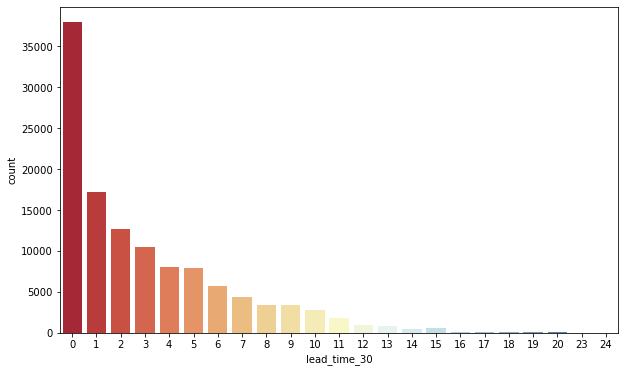

In [36]:
#### ====== VISUALISASI DATA ========
#### Univariate

##== lead_time (days)
# data['lead_time'].describe()
data['lead_time_30'] = data['lead_time']//30 #convert to month
# data['lead_time_30'].describe()

##Visualisasi Data
plt.figure(figsize=(10,6))
sns.countplot(x=data['lead_time_30'], palette='RdYlBu')

#Interpretasi:
#banyak customers yang waktu antara booking hotel dengan tanggal kedatangan (arrival date) kurang dari 1 bulan

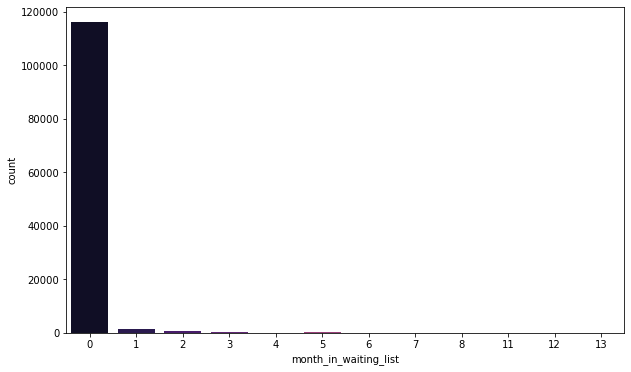

In [185]:
##== days_in_waiting_list column
# data['days_in_waiting_list'].describe()
data['month_in_waiting_list'] = data['days_in_waiting_list']//30 #conver to month
# data['month_in_waiting_list'].describe()

##Visualisasi Data
plt.figure(figsize=(10,6))
sns.countplot(x=data['month_in_waiting_list'], palette='magma')

#Interpretasi:
# waiting list customers kurang dari 1 bulan sampai dikonfirmasi

Text(0.5, 0, 'Arrival Year')

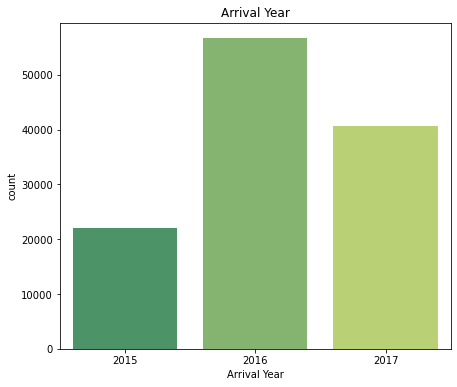

In [144]:
##== arrival date column
#Visualisasi Data
plt.figure(figsize=(7,6))
sns.countplot(x=arrival_date_dt.year, palette='summer')
plt.title('Arrival Year')
plt.xlabel('Arrival Year')


Text(0.5, 0, 'Arrival Month')

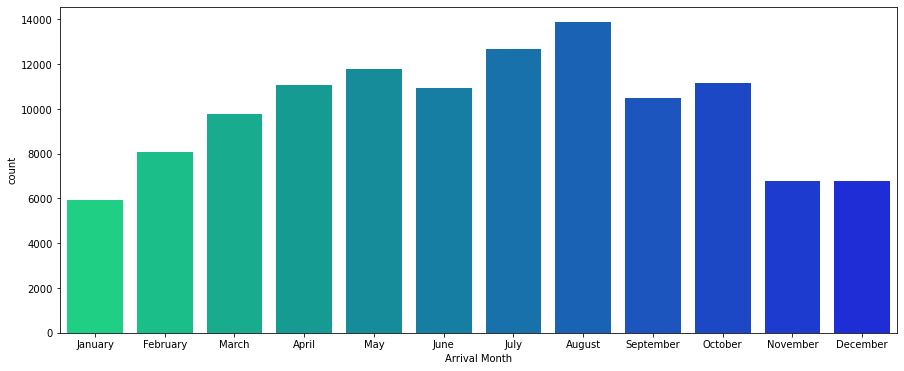

In [63]:
##== arrival date column
plt.figure(figsize=(15,6))
order = ['January','February','March','April', "May", 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(x=arrival_date_dt.month_name(), order=order, palette='winter_r')
plt.xlabel('Arrival Month')

#Interpretasi:
#Terlihat banyak customers yang datang pada bulan Agustus

Text(0.5, 0, 'Arrival Day')

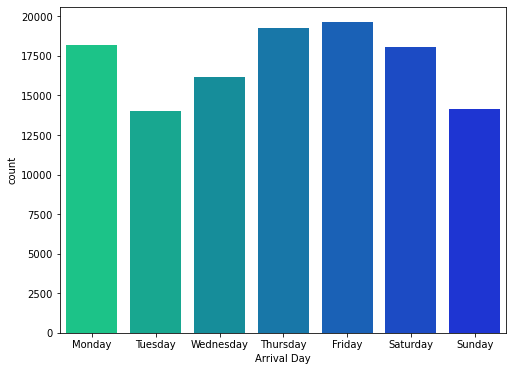

In [82]:
##== arrival date column
plt.figure(figsize=(8,6))
order=['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday','Saturday','Sunday']
sns.countplot(x=arrival_date_dt.day_name(), palette='winter_r', order=order)
plt.xlabel('Arrival Day')

In [ ]:
sns.heatmap()

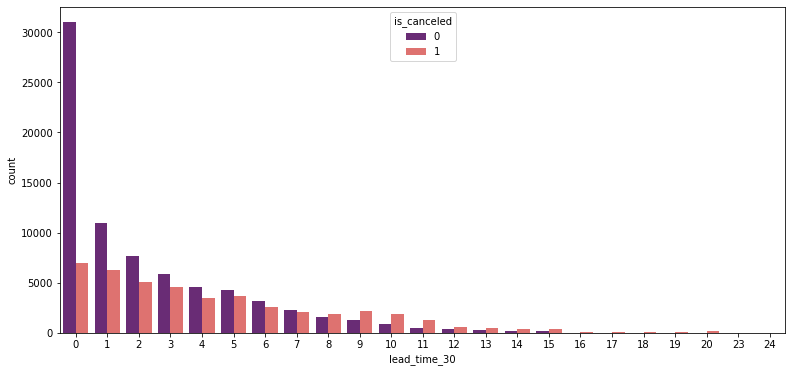

In [184]:
#### ====== VISUALISASI DATA ========
### Bivariate/Multivariate

##== graph between is_canceled and lead_time_30
plt.figure(figsize=(13,6))
sns.countplot(x=data['lead_time_30'], hue=data['is_canceled'], palette='magma')

#Interpretasi:
#customers cenderung melakukan cancel booking setelah lead time lebih dari 7 bulan

Text(0.5, 1.0, 'Arrival Month VS is_canceled')

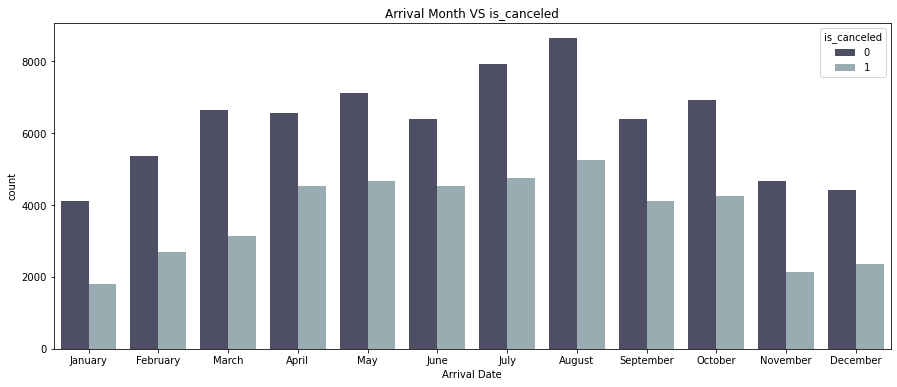

In [61]:
##== graph between arrival date column and is_canceled
order = ['January','February','March','April', "May", 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(15,6))
sns.countplot(x=arrival_date_dt.month_name(), palette='bone',hue=data['is_canceled'], order=order)
plt.title('Arrival Month VS is_canceled')

#Interpretasi:
#cancel tertinggi terjadi pada bulan agustus, kemudian setelahnya mengalami penurunan 

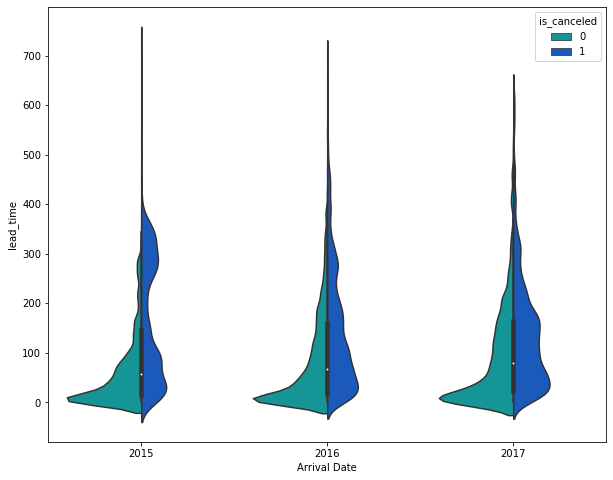

In [103]:
## graph among is_canceled, Arrival Date, lead_time (days)
plt.figure(figsize=(10,8))
sns.violinplot(x=arrival_date_dt.year, y='lead_time', data=data, palette='winter_r', hue='is_canceled',
              split=True)

#Interpretasi:
#dari tahun 2015-2017,customers yang tidak melakukan cancel booking (0) memiliki range lead_time yang hampir sama (0-300)days
#sedangkan untuk customers yang melakkan cancel booking(1) memiliki distribusi sebaran data yang lebih luas (0-425)days
#semakin lama lead_time maka customers akan melakukan cancel book

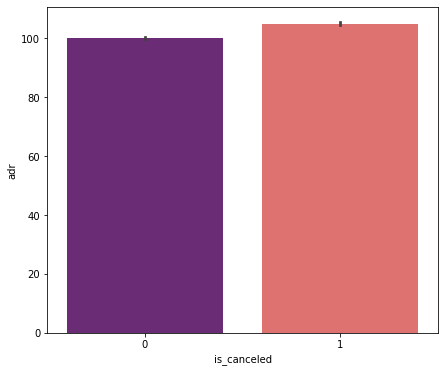

In [140]:
##graph between is_canceled and adr
#start from this problem
plt.figure(figsize=(7,6))
sns.barplot(x='is_canceled', y='adr', data=data, palette='magma')

#interpretasi:
#adr pada cancel booking lebih tinggi dibandingkan dengan yang tidak cancel booking
#artinya adr yang tinggi menyebabkan customers melakukan cancel booking

<Figure size 936x504 with 0 Axes>

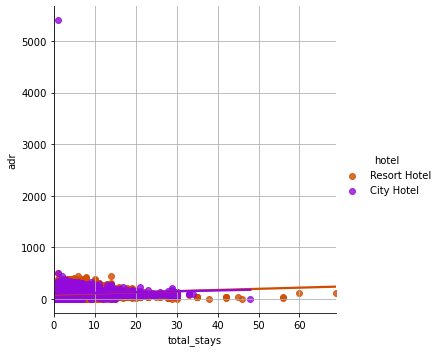

In [38]:
##lmplot between hotel and total_stays, idr
plt.figure(figsize=(13,7))
sns.lmplot(x='total_stays', y='adr', data=data, hue='hotel', palette='gnuplot_r')
plt.grid()

#interpretasi:
#terlihat bahwa resort hotel memiliki range stay yang lebih lama
#semakin kecil total stays maka nilai adr akan semakin tinggi
#sebaliknya apabila total_stays tinggi maka adr rendah

<Figure size 936x504 with 0 Axes>

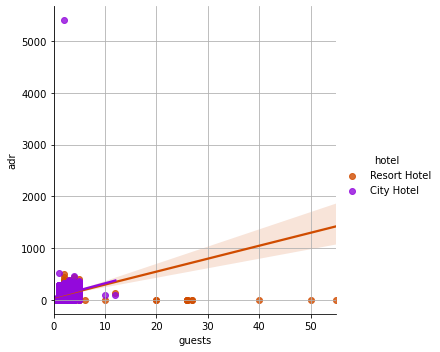

In [183]:
#graph among adr, guests, hotel
plt.figure(figsize=(13,7))
sns.lmplot(x='guests', y='adr', data=data, hue='hotel', palette='gnuplot_r')
plt.grid()

#interpretasi:
#antara guests dengan adr memiliki hubungan yang positif
#guests banyak terdapat pada resort hotel
#semakin banyak guests maka adrnya akan semakin tinggi

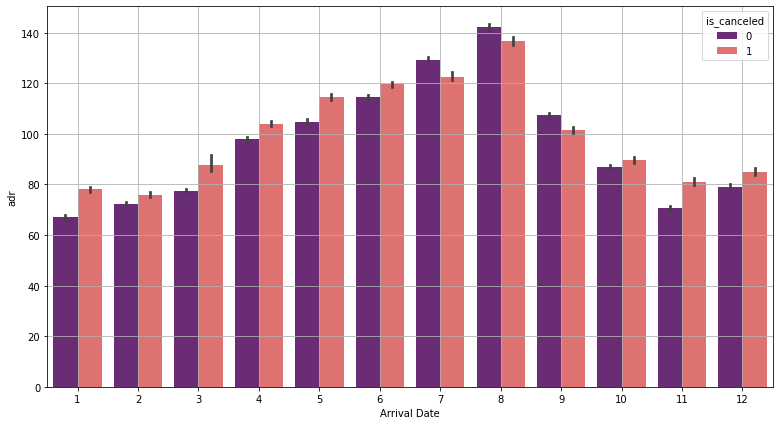

In [114]:
#graph among is_canceled, arrive month, adr
plt.figure(figsize=(13,7))
sns.barplot(x=arrival_date_dt.month,y='adr', data=data, hue='is_canceled', palette='magma')
plt.grid()

#Interpretasi:
#terlihat selain pada bulan July, August, September, rata2 adr pada cancel booking lebih tinggi dibandingkan not cancel

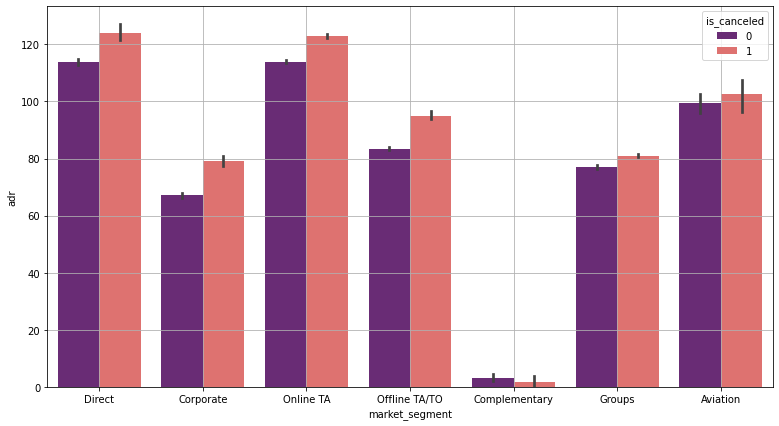

In [115]:
#graph among adr, is_cancel, market_segment
plt.figure(figsize=(13,7))
sns.barplot(x='market_segment',y='adr', data=data, hue='is_canceled', palette='magma')
plt.grid()

#Interpretasi:
#adr pada cancel booking (1) dari masing2 market segment selalu lebih tinggi dibandingkan no cancel booking(0) kecuali pada Complementary

Text(0.5, 1.0, 'Total Stays (days) VS adr')

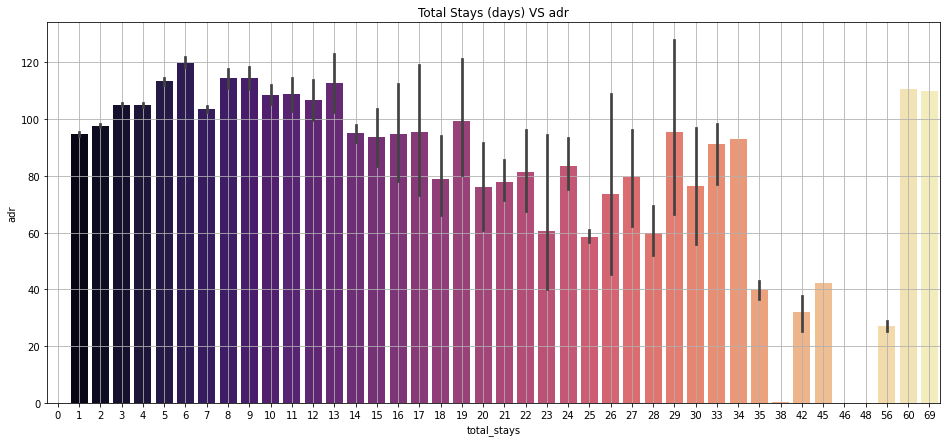

In [158]:
plt.figure(figsize=(16,7))
sns.barplot(x='total_stays',y='adr', data=data, palette='magma')
plt.grid()
plt.title('Total Stays (days) VS adr')

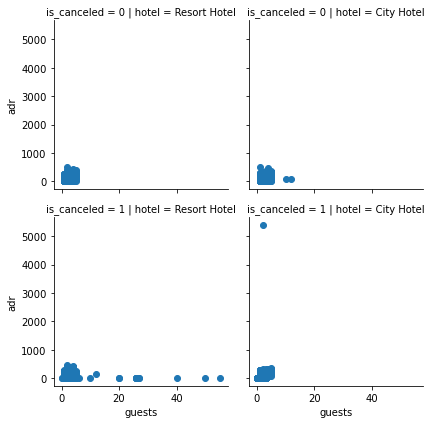

In [166]:
# Graph among is_canceled, hotel, guests, adr
F = sns.FacetGrid(data, col='hotel', row='is_canceled') ## disini col, row, hue ha
F.map(plt.scatter, 'guests', 'adr').add_legend()


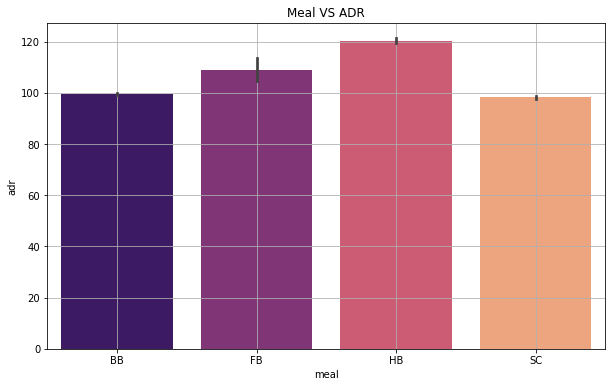

In [178]:
#graph between adr, meal
#Note:['Bed & Breakfast','Half board','Full Board','No Pakages']
plt.figure(figsize=(10,6))
sns.barplot(x=data['meal'], y=data['adr'], palette='magma')
plt.title('Meal VS ADR')
plt.grid()

#interpretasi:
#exspensive meals ==> HB
#Half board memiliki rata2 adr yang paling tinggi 
#HB : Half board (breakfast and oneother meal – usually dinner)


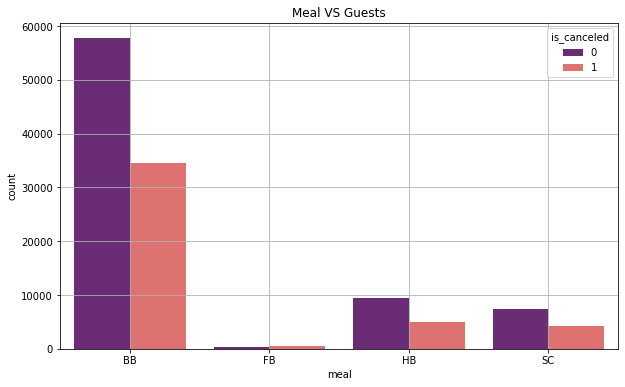

In [187]:
#graph between guests, meal
#Note:['Bed & Breakfast','Half board','Full Board','No Pakages']
plt.figure(figsize=(10,6))
sns.countplot(x=data['meal'], palette='magma', hue=data['is_canceled'])
plt.title('Meal VS Guests')
plt.grid()

#Interpretasi:
#most meal to be likes ==> BB

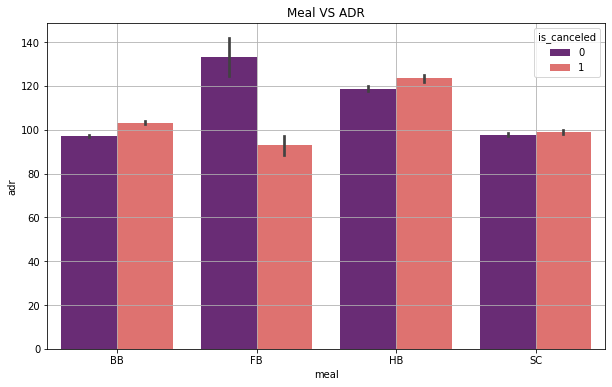

In [179]:
#graph between adr, meal, is_canceled
#Note:['Bed & Breakfast','Half board','Full Board','No Pakages']
plt.figure(figsize=(10,6))
sns.barplot(x=data['meal'], y=data['adr'], palette='magma', hue=data['is_canceled'])
plt.title('Meal VS ADR')
plt.grid()

#interpretasi:


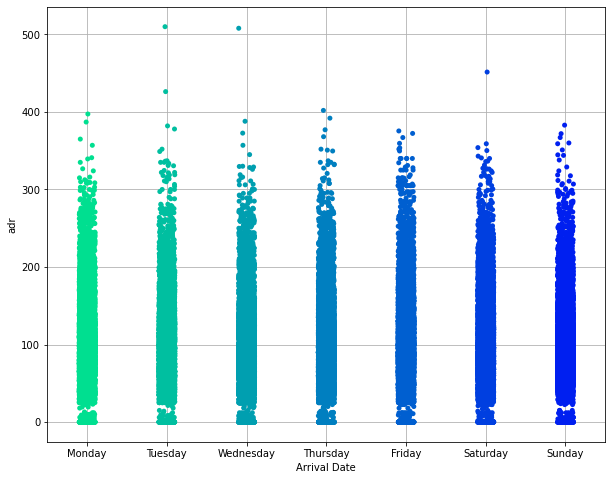

In [20]:
##Stripplot untuk data not cancel (0)
plt.figure(figsize=(10,8))
order=['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday','Saturday','Sunday']
sns.stripplot(x=arrival_date_dt.day_name(), y='adr', data=data_not_cancel, palette='winter_r',order=order,dodge=True)
plt.grid()
#

Text(0.5, 1.0, 'Month Arrival VS adr')

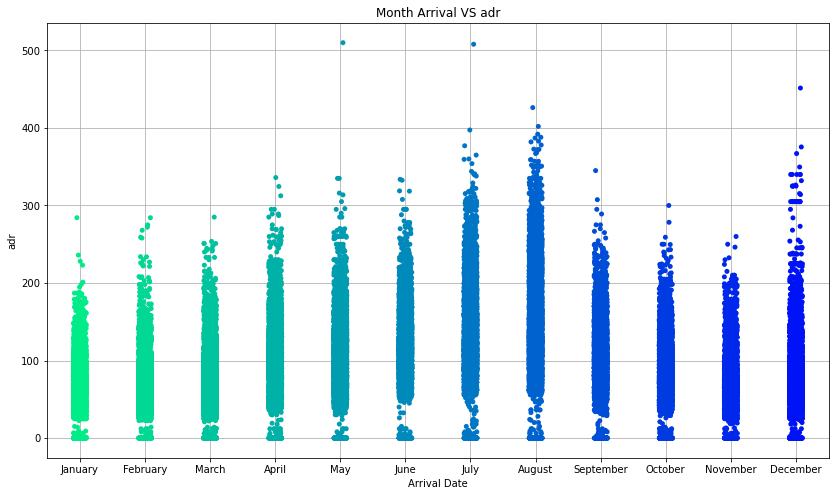

In [29]:
##Stripplot untuk data not cancel (0)
plt.figure(figsize=(14,8))
order = ['January','February','March','April', "May", 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.stripplot(x=arrival_date_dt.month_name(), y='adr', data=data_not_cancel, palette='winter_r',order=order,dodge=True)
plt.grid()
plt.title('Month Arrival VS adr')
#